# Introduction to Machine Learning with Python

* Weak AI: <font color=gray>*Automation*</font>
    * Symbolic AI: <font color=gray>*Programming*</font>
    * **Machine Learning**: <font color=gray>*Statistical Programs*</font>
        * Supervised Learning: <font color=gray>*History: (Observables X, Unobservables Y)*</font>
            * **Regression**: <font color=gray>*Y is a Quantity*</font>
                * Linear Regression: <font color=gray>*y = f(x) is a straight line*</font>
                * ...
            * **Classification**: <font color=gray>*Y is a Category*</font>
                * Decision Tree: <font color=gray>*y = f(x) is a series of splits*</font>
        * Unsupervised: <font color=gray>*History: (Observables X, ...)*</font>
            * **Clustering**: <font color=gray>*X -> {GroupA, GroupB, ...}*</font>
                * k-Means 
            * Compression: <font color=gray>*Big X -> Small X st. keep information*</font>
                * PCA
            * Descriptive Statistics: <font color=gray>*Summarising Data*</font>
                * eg., Mean
* Strong AI: <font color=gray>*Open Exploration*</font>
    * imagation, curiosity, acting within environment, acting upon environment, 
    * internal motivation system ("emotion", obligation, ...),
    * body (motor system, ...)

## How does machine learning solve (narrow, statistical) problems?

* Step 0. Get Data: Import -> Select -> Prepare Data
* Step 1. Learning: Data -> Algorithm -> Model
* Step 2. Inference: NewData -> Model -> Prediction 

---
* Step 0. $D_{datasets} \rightarrow (cols, \dots) \rightarrow (X, y)$
* Step 1. $(X, y) \rightarrow \mathcal{A} \rightarrow f(x)$
* Step 2. $ f(x_{new}) \rightarrow y_{new}$

--- 

* Step 0. `df = pd.read_csv(); X = df[cols];  y = df[col]`
* Step 1. `model = algorithm.fit(X, y)`
* Step 2. `y_new = model.predict([ x1_new, x2_new ...])`

## What are the key problems machine learning can solve?

* Regression
    * predict an unobservable quantity from observables (using history of both)
* Classification  
    * predict an unobservable category from observables (using history of both)
* Clustering
    * split a dataset into groups of similar points (using only observable data)
    * ie., group stuff / split into groups / "cluster"}

## How do I solve these problems in python?

The relevant library in python is "Sci-Kit Learn", which is imported,

In [2]:
import sklearn

But sklearn is more like a library of libraries, so we typically import something more specific,

In [3]:
from sklearn.linear_model import LinearRegression 

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.cluster import KMeans

Above we have imported three *algorithms* which can analyse datasets and produce *models*. 

## How do I use `sklearn` algorithms to obtain inferential models?

In [10]:
import pandas as pd

ti = pd.read_excel('titanic.xlsx').drop(columns=['deck']).dropna()

In [11]:
ti.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
620,0,3,male,27.0,1,0,14.4542,C,Third,man,True,Cherbourg,no,False
472,1,2,female,33.0,1,2,27.7500,S,Second,woman,False,Southampton,yes,False
427,1,2,female,19.0,0,0,26.0000,S,Second,woman,False,Southampton,yes,True


#### Step 1: Find the model

In [13]:
X = ti[['fare']]
y = ti['age']

f_model = LinearRegression().fit(X, y)

#### Step 2: Infer

In [18]:
f_model.predict([
    [20],
    [10],
    [5]
])

array([29.27063529, 29.01564044, 28.88814301])

If you dont know anything, predicting the mean is a pretty good prediction...

In [56]:
age_mean = ti['age'].mean()
age_mean

29.64209269662921

The algorithm above has produced a model which basically just predicts the mean. The mean is a *learnt* metric (ie., some learning has taken place) -- but it is perhaps the most simple possible.

That our model basically predicts the mean shows it's learnt really very little about *individual people*, and therfore has learnt not much in general. 

When evaluating the quality of our models, we should compare them to "good *naive* solutions" (such as the mean) rather than just random stuff. It's very easy to believe you've done extremely well if you just compare to a random guess.

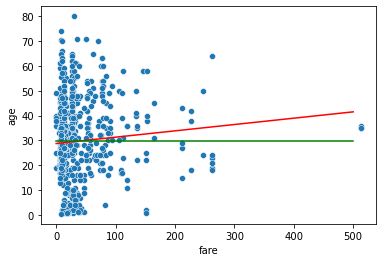

In [58]:
sns.scatterplot(x=ti['fare'], y=ti['age'])
sns.lineplot(color="red", x=[0, 100, 300, 500], y=f_model.predict([[0], [100], [300], [500]]));
sns.lineplot(color="green", x=[0, 100, 300, 500], y=[age_mean, age_mean, age_mean, age_mean]);

### Example: Classification

Ask the algorithm to `fit`, or "Learn",

In [62]:
clf_model = DecisionTreeClassifier().fit(ti[['age', 'fare']], ti['survived'])

Ask the model to predict,

In [63]:
clf_model.predict([
    [8, 2],
    [8, 20],
    [30, 50],
    [13, 50],
    [80, 5],
])

array([1, 0, 0, 0, 0], dtype=int64)

#### Aside: visualizing the model's predictions

In [61]:
ages = fares = list(range(0, 100))

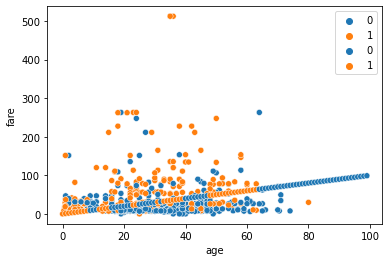

In [65]:
sns.scatterplot(x=ti['age'], y=ti['fare'], hue=ti['survived']);
sns.scatterplot(x=ages, y=fares, hue=clf_model.predict(list(zip(ages, fares))))

### Aside: Example: Clustering

With k-Means clustering, we also the algorithm to try to find various numbers of groups. Below, eg., we ask it to split the data into 1 to 21 groups.

In [67]:
scores = []
groups = [] 

for k in range(1, 21):
    groups.append(k)
    scores.append(KMeans(k).fit(ti[['age', 'fare']]).inertia_)

We track the "inertia", or, how well the split has happened.

In [68]:
import seaborn as sns

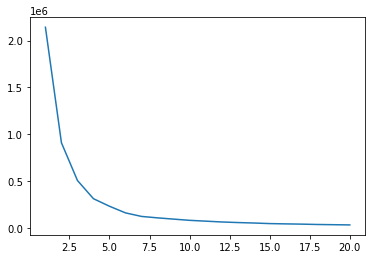

In [69]:
sns.lineplot(x=groups, y=scores);

You can always keep splitting data, so we *guess* that there's probably c. 3 groups -- based on there being dimishing returns after that point,

In [75]:
model = KMeans(3).fit(ti[['age', 'fare']])

To plot the solution, we can plot where it thinks the centres of the groups are,

In [76]:
centres = model.cluster_centers_
centres

array([[ 28.35347826,  16.26417322],
       [ 31.16666667, 285.38148333],
       [ 35.63798319,  85.06820756]])

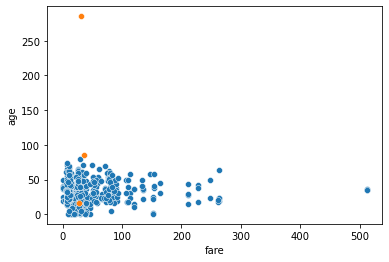

In [77]:
sns.scatterplot(x=ti['fare'], y=ti['age'])
sns.scatterplot(x=centres[:, 0], y=centres[:, 1])

## Exercise (30 min)

Choose a problem domain (eg., retail, finance, banking,... health, foods, preferences). Provide the algorithms with suitable datasets, and observe and characterise the quality and nature of their predictions. 

### Part 1: Regression

Modify the `X` dataset and `y` to represent relevant aspects of your problem: choose what can be observed, and what can be predicted. 

Introduce at least 10 points total, if possible, more.

In [104]:
# annie_hall, transformers, america_beauty

X = [
    [10, 3, 7], # eg., Alice
    [9, 0, 9],
    [3, 6, 8],
    [3, 3, 2],
    [1, 9, 1]
]

# how much the above customers spent on our new film (prescreening)

y = [
    20, 
    15, 
    7, 
    7, 
    5
]

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
model = LinearRegression().fit(X, y)

In [110]:
X_new = [ 
    # we dont know what these people will spend
    [1, 3, 7],
    [6, 10, 10],
    [1, 6, 8],
    [3, 3, 2],
    [1, 9, 1]
]

predictions = model.predict(X_new)

In [108]:
predictions

array([ 1.45547223, 14.07593157,  2.62022498,  6.56936958,  5.53609093])

In [109]:
for user, prediction in zip(X_new, predictions):
    print(user, ' = ', prediction)

[1, 3, 7]  =  1.4554722287321313
[6, 10, 10]  =  14.075931567846263
[1, 6, 8]  =  2.620224982423248
[3, 3, 2]  =  6.569369580501523
[1, 9, 1]  =  5.536090930396061


### Part 2: Classification (Stretch)

0. Revise this notebook and understand what classifiction means
    * y is a label
1. Above, repeat all the code in a single cell
2. Change `LinearRegression` to `DecisionTreeClassifier`
    * HINT: `from sklearn.tree import DecisionTreeClassifier`
3. Your `y` should now be *categories*
    * HINT: try using text labels (eg., HOT, COLD) in `y`
    * HINT: just use `1`, `0`

---

## Appendix: Data Preparation

In [3]:
import numpy as np

In [14]:
import seaborn as sns

ti = sns.load_dataset('titanic').drop(columns=['deck']).dropna()

In [15]:
ti.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False
352,0,3,male,15.0,1,1,7.2292,C,Third,child,False,Cherbourg,no,False


In [20]:
y = ti['survived']

## Example: Ordinal Encoder

* Ordinal = Ordered Integers
* Ordinal encoders replace text with ranked numbers
    * if the algorithm is "mean()" based (eg., regression) then it may be somewhat unreliable
        * it will compute, eg., 1.5 from (1, 2) --- ("Leeds", "London") which is meaningless
* DecisionTree is a "mode()"-based (/frequency) so ordinal encoding is good

In [17]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [28]:
enc= OrdinalEncoder()
x_town = enc.fit_transform(ti[['embark_town']])

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf = DecisionTreeClassifier().fit(x_town, y)

In [38]:
x_test = enc.transform([['Cherbourg'], ['Southampton']]); x_test

array([[0.],
       [2.]])

In [40]:
clf.predict(x_test)

array([1, 0])

## Example: OneHotEncoding

* How do you change text to numbers without a distance/mean()-based algorithm going wrong?

In [41]:
categories = ["Leeds", "London", "Manchester"] # x = one column


# x = x1,x2,x3 = three columns
leeds = [1, 0, 0]
london = [0, 1, 0]
manchester = [0, 0, 1]


In [43]:
enc = OneHotEncoder()
x_oh = enc.fit_transform(ti[['embark_town']])

In [45]:
x_oh.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [46]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression().fit(x_oh, y)

In [49]:
lr.predict(
    enc.transform([['Cherbourg'], ['Southampton']])
)

array([1, 0])

In [51]:
ti["survived"].groupby(ti["embark_town"]).mean()

embark_town
Cherbourg      0.607692
Queenstown     0.285714
Southampton    0.362816
Name: survived, dtype: float64